In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel(r"D:\Ultimate Programming\Data Bases\ESD.xlsx")

In [3]:
dataset['Attrition'] = dataset['Exit Date'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [4]:
dataset.head(2)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Attrition
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,1
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,0


In [5]:
df = dataset.drop(columns=['EEID', 'Full Name', 'Exit Date'], axis=1)

In [6]:
df.head(2)

,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Attrition
0,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,1
1,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,0


In [7]:
df.shape

(1000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Job Title      1000 non-null   object        
 1   Department     1000 non-null   object        
 2   Business Unit  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Ethnicity      1000 non-null   object        
 5   Age            1000 non-null   int64         
 6   Hire Date      1000 non-null   datetime64[ns]
 7   Annual Salary  1000 non-null   int64         
 8   Bonus %        1000 non-null   float64       
 9   Country        1000 non-null   object        
 10  City           1000 non-null   object        
 11  Attrition      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 93.9+ KB


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Attrition
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,0.085000
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,0.000000
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,0.000000
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,0.000000
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,0.000000
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,1.000000
std,11.246981,NaN,53545.985644,0.117856,0.279021


## Exploratory Data Analysis

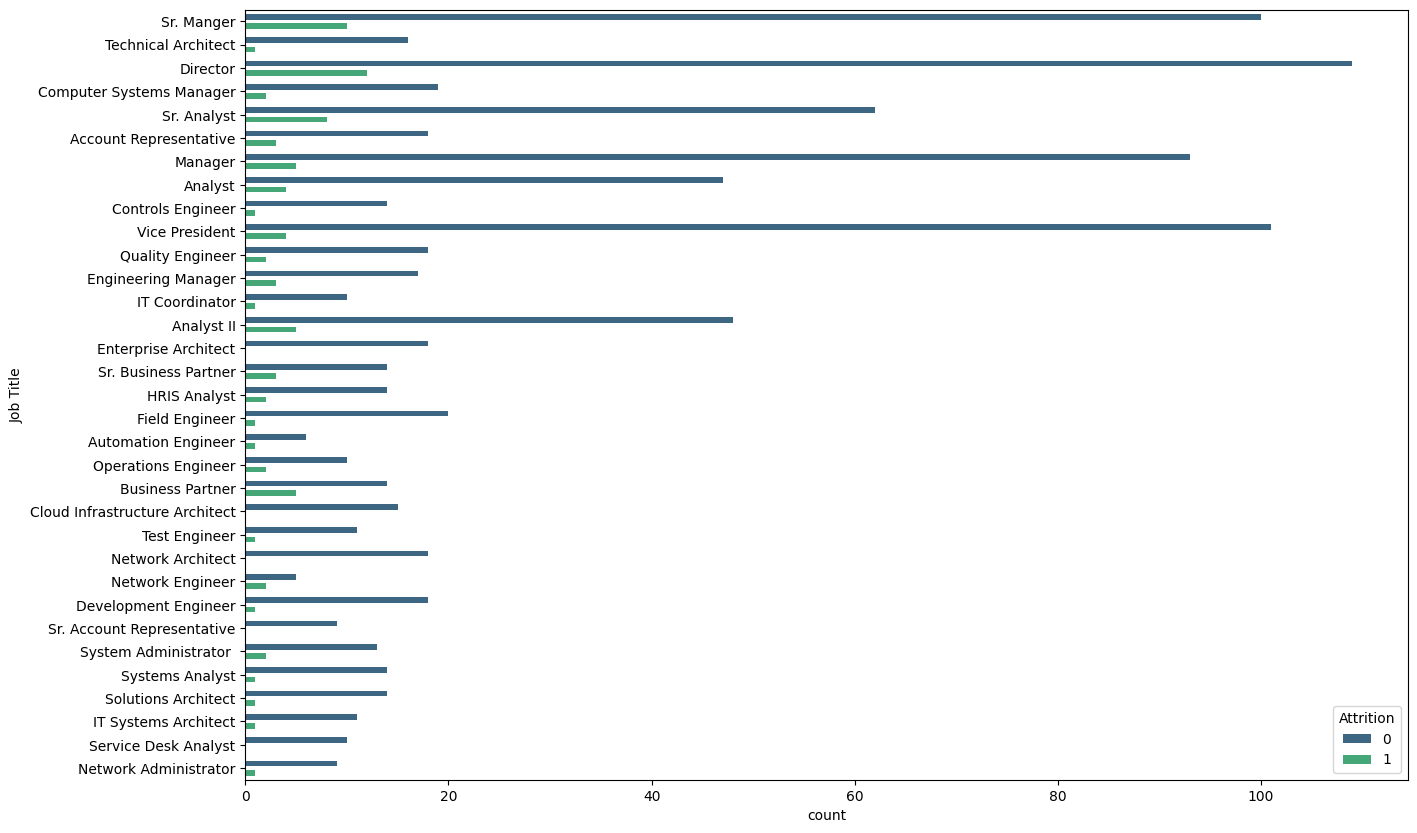

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data = df, y ='Job Title', hue='Attrition', palette='viridis', gap=0.4)
plt.show()

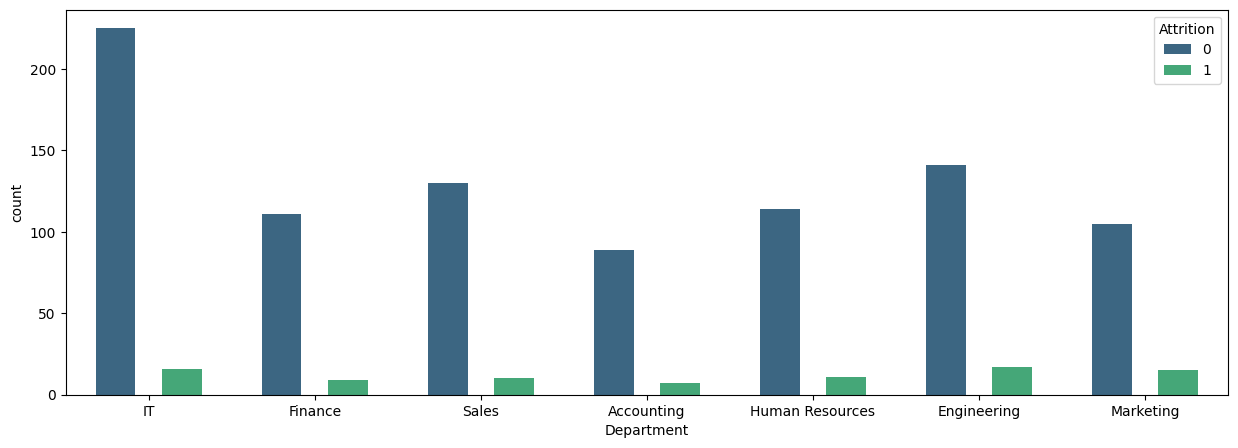

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x ='Department', hue='Attrition', palette='viridis', gap=0.4)
plt.show()

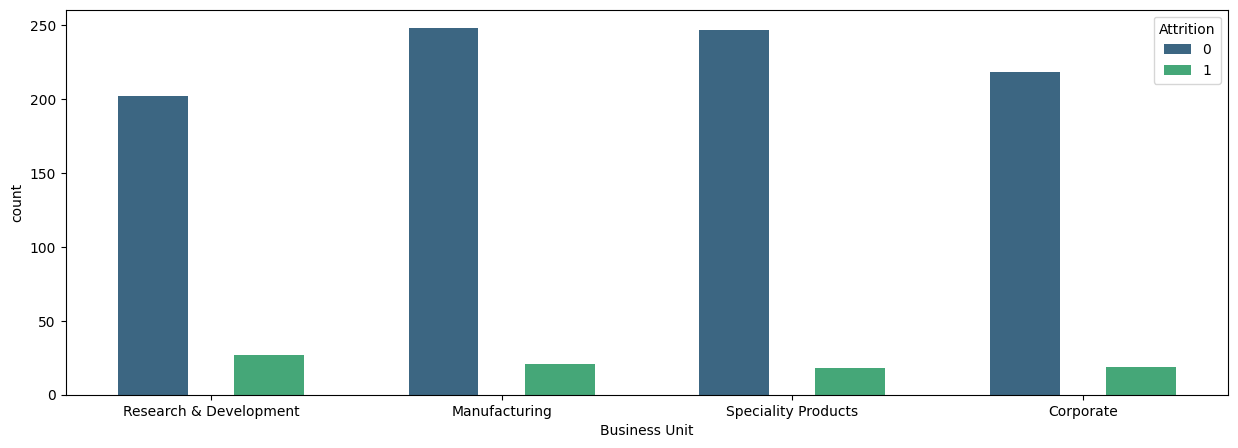

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x ='Business Unit', hue='Attrition', palette='viridis', gap=0.4)
plt.show()

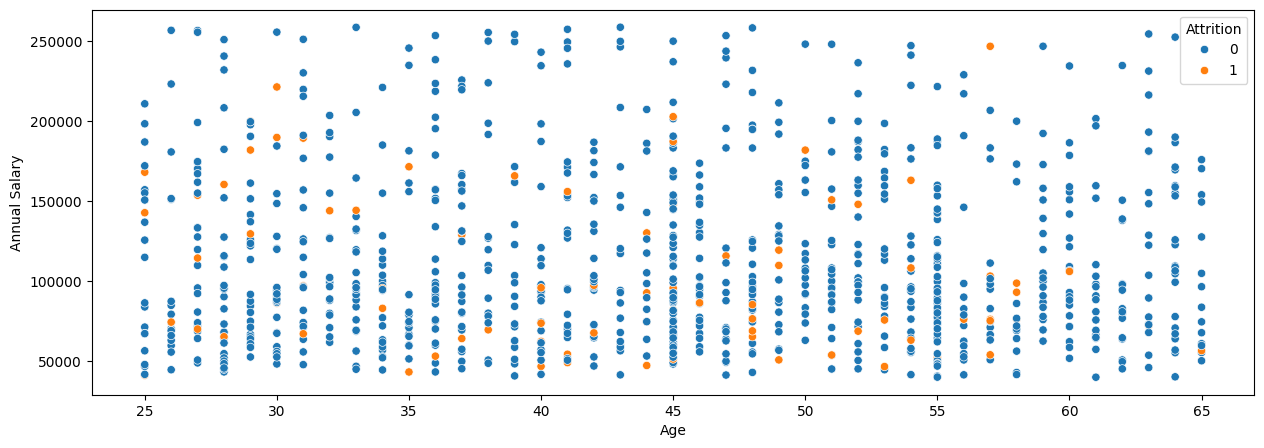

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x= 'Age', y='Annual Salary', hue='Attrition')
plt.show()

<Axes: xlabel='Hire Year'>

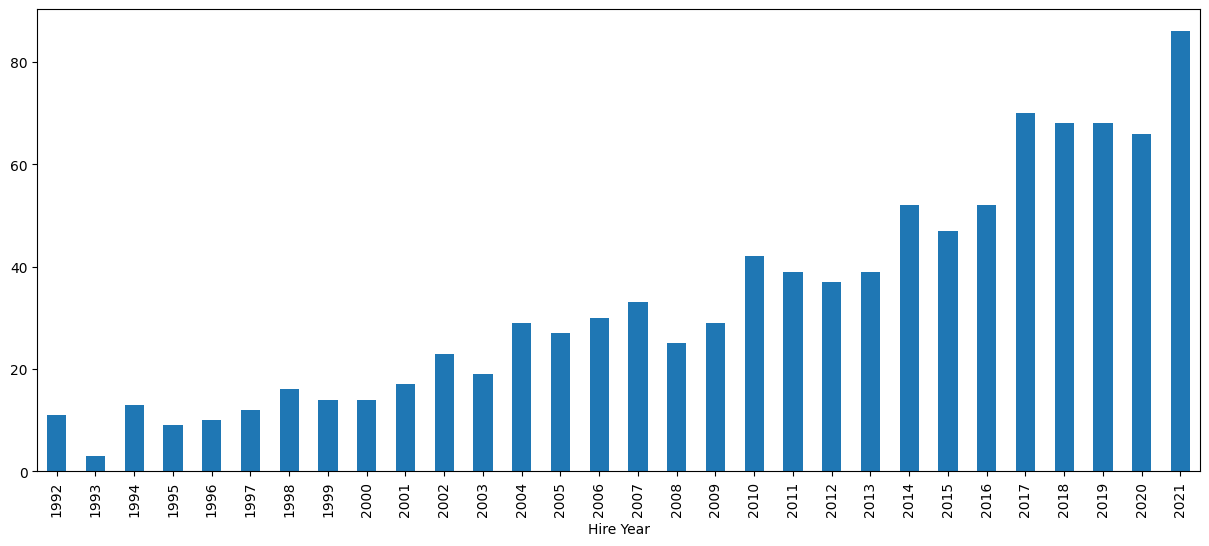

In [16]:
plt.figure(figsize=(15, 6))
df['Hire Year'] = df['Hire Date'].dt.year

df['Hire Year'].value_counts().sort_index()

df['Hire Year'].value_counts().sort_index().plot(kind='bar')

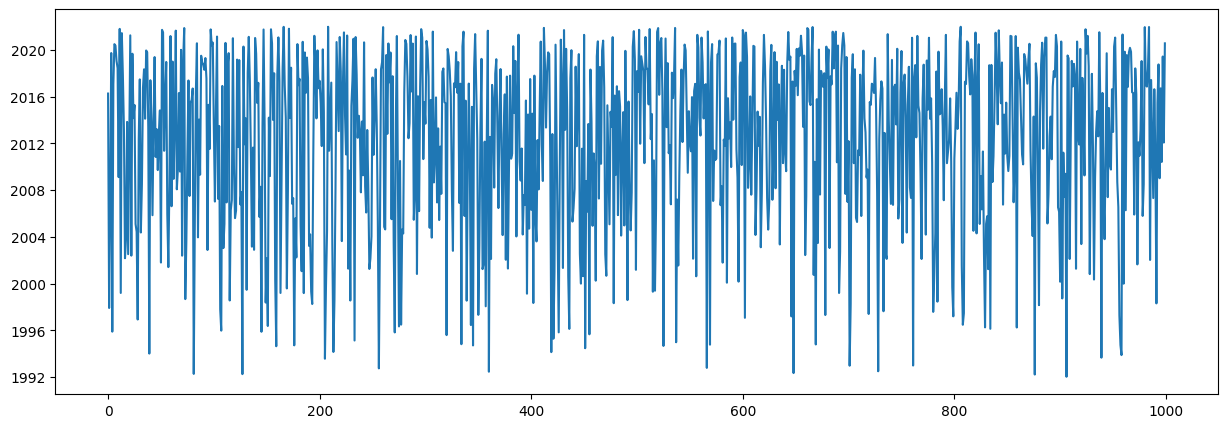

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(df['Hire Date'])
plt.show()

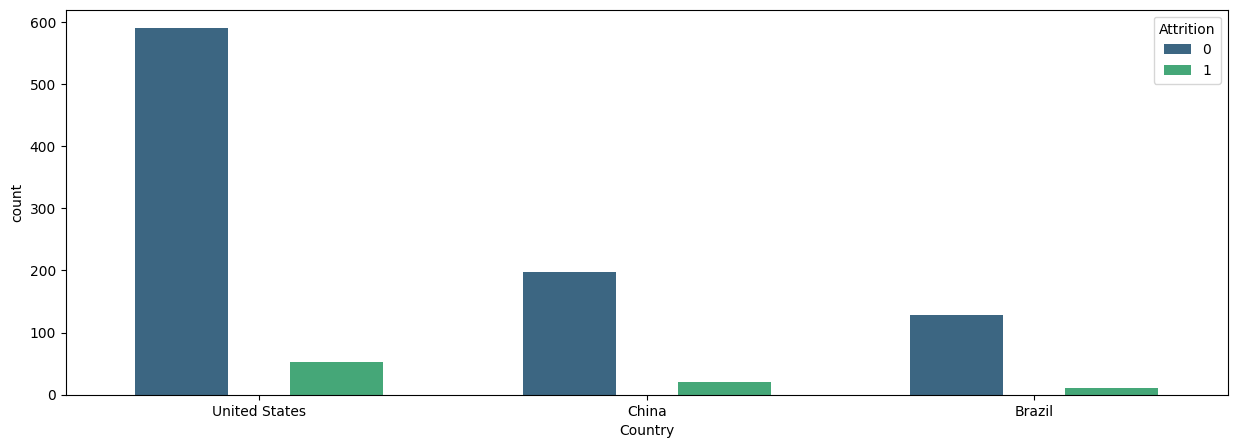

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x ='Country', hue='Attrition', palette='viridis', gap=0.4)
plt.show()

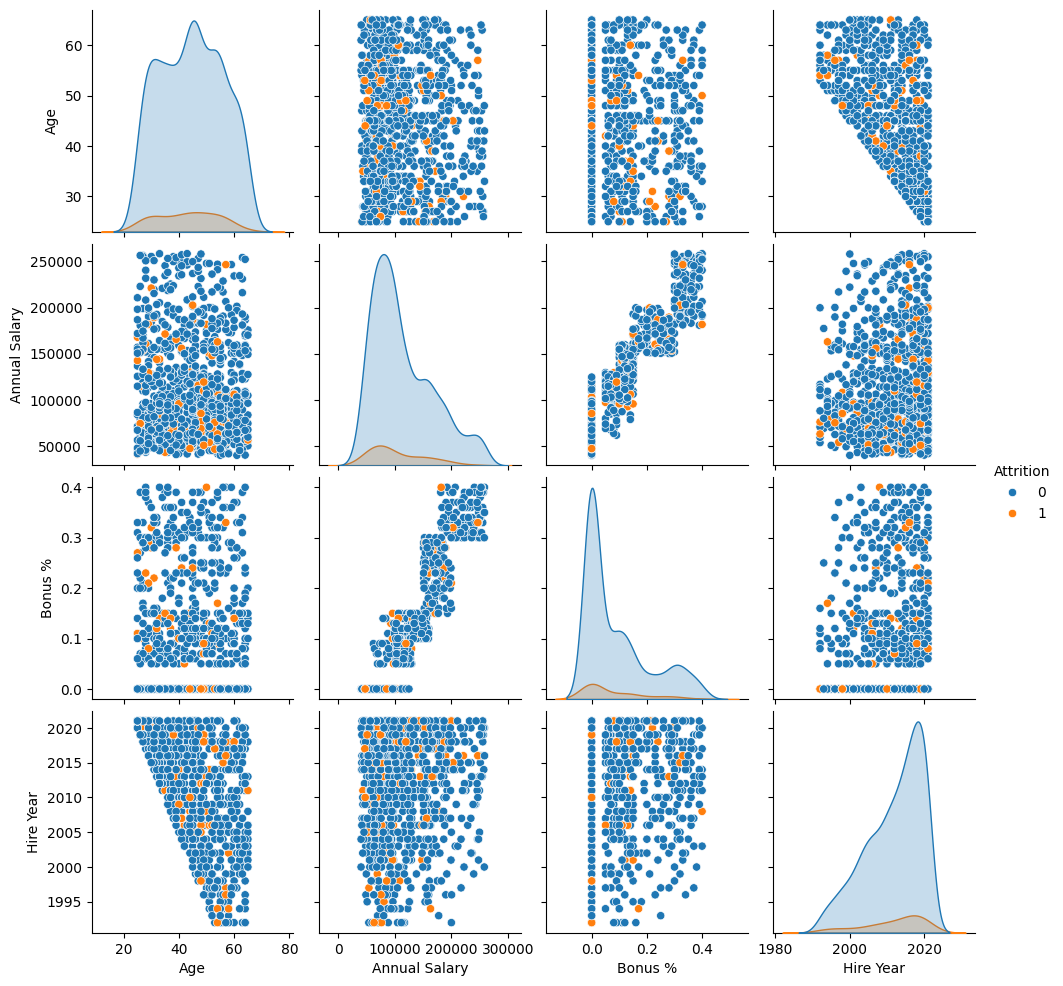

In [19]:
sns.pairplot(data=df, hue='Attrition')
plt.show()

# Data Preprocessing For Algorithm

In [66]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
x = df.drop(columns=['Attrition', 'Hire Date'], axis = 1)
y = df['Attrition']

In [23]:
x.head(2)

,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Annual Salary,Bonus %,Country,City,Hire Year
0,Sr. Manger,IT,Research & Development,Female,Black,55,141604,0.15,United States,Seattle,2016
1,Technical Architect,IT,Manufacturing,Male,Asian,59,99975,0.00,China,Chongqing,1997


In [24]:
low_cat_features = ['Gender', 'Department', 'Business Unit', 'Country', 'Ethnicity']
high_cat_features = ['Job Title', 'City']

ct = ColumnTransformer(
    transformers=[
      ('oh', OneHotEncoder(drop='first', sparse_output=False), low_cat_features),
      ('or', OrdinalEncoder(dtype='int32'), high_cat_features)
    ],remainder='passthrough')

In [25]:
ct.fit(x)

,transformers,"[('oh', ...), ('or', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [26]:
x_en = ct.transform(x)

In [27]:
x_en = pd.DataFrame(x_en, columns=ct.get_feature_names_out())
x_en.head(2)

,oh__Gender_Male,oh__Department_Engineering,oh__Department_Finance,oh__Department_Human Resources,oh__Department_IT,oh__Department_Marketing,oh__Department_Sales,oh__Business Unit_Manufacturing,oh__Business Unit_Research & Development,oh__Business Unit_Speciality Products,...,oh__Country_United States,oh__Ethnicity_Black,oh__Ethnicity_Caucasian,oh__Ethnicity_Latino,or__Job Title,or__City,remainder__Age,remainder__Annual Salary,remainder__Bonus %,remainder__Hire Year
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,27.0,11.0,55.0,141604.0,0.15,2016.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,4.0,59.0,99975.0,0.00,1997.0


In [28]:
ru = RandomOverSampler()
ru_x, ru_y = ru.fit_resample(x_en, y)

In [29]:
ru_y.value_counts()

Attrition
1    915
0    915
Name: count, dtype: int64

In [55]:
x1_train, x1_test, y1_train, y1_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_en, y, test_size=0.2, random_state=42)

In [33]:
df['Attrition'].value_counts()

Attrition
0    915
1     85
Name: count, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [35]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr1 = LogisticRegressionCV(class_weight='balanced', random_state=42)

In [36]:
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
lr1.fit(x_train, y_train)

,Cs,10
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,'balanced'
,n_jobs,None


In [38]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(54.87499999999999, 57.49999999999999)

In [39]:
lr1.score(x_train, y_train)*100, lr1.score(x_test, y_test)*100

(63.5, 58.5)

In [40]:
f1_score(y_test, lr.predict(x_test))*100

8.60215053763441

In [41]:
confusion_matrix(y_test, lr.predict(x_test))

array([[111,  76],
       [  9,   4]])

In [42]:
f1_score(y_test, lr.predict(x_test))*100

8.60215053763441

In [43]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [44]:
gb = GaussianNB()

In [56]:
gb.fit(x1_train, y1_train)

,priors,None
,var_smoothing,1e-09


In [58]:
round(gb.score(x1_train, y1_train)*100, 1), round(gb.score(x1_test, y1_test)*100, 1)

(56.7, 56.0)

In [59]:
bb = BernoulliNB()
bb.fit(x1_train, y1_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [60]:
round(bb.score(x1_train, y1_train)*100, 1), round(bb.score(x1_test, y1_test)*100, 1)

(56.6, 55.7)

In [85]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth)
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [86]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(76.5, 66.5)

In [64]:
model = RandomForestClassifier(class_weight='balanced', random_state=30)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
model.score(x_train, y_train)*100, model.score(x_test, y_test)*100

(100.0, 93.5)

In [87]:
for i in range(5, 20):
    dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=i)
    dt.fit(x_train, y_train)
    print(f"{i} =>  {dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100}")

5 =>  (47.375, 42.5)
6 =>  (64.125, 56.99999999999999)
7 =>  (62.0, 49.5)
8 =>  (73.125, 58.5)
9 =>  (76.5, 66.5)
10 =>  (80.875, 71.0)
11 =>  (86.875, 76.0)
12 =>  (91.0, 79.0)
13 =>  (95.5, 82.5)
14 =>  (97.25, 84.5)
15 =>  (97.875, 85.5)
16 =>  (98.75, 85.0)
17 =>  (99.0, 86.0)
18 =>  (99.0, 85.5)
19 =>  (99.75, 86.5)
